# Model of Heart Failure Prediction

***About this Dataset***


**Context:**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

**Source**
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Load DataSet

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.shape

(918, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
# Verifico si alguna columna contiene datos nulos
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## We start to analisis the data

In [13]:
# hacemos un conteo de cuantas personas tienen una enfermedad del corazon
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

#### Visualizamos los datos de cada una columna en un histograma

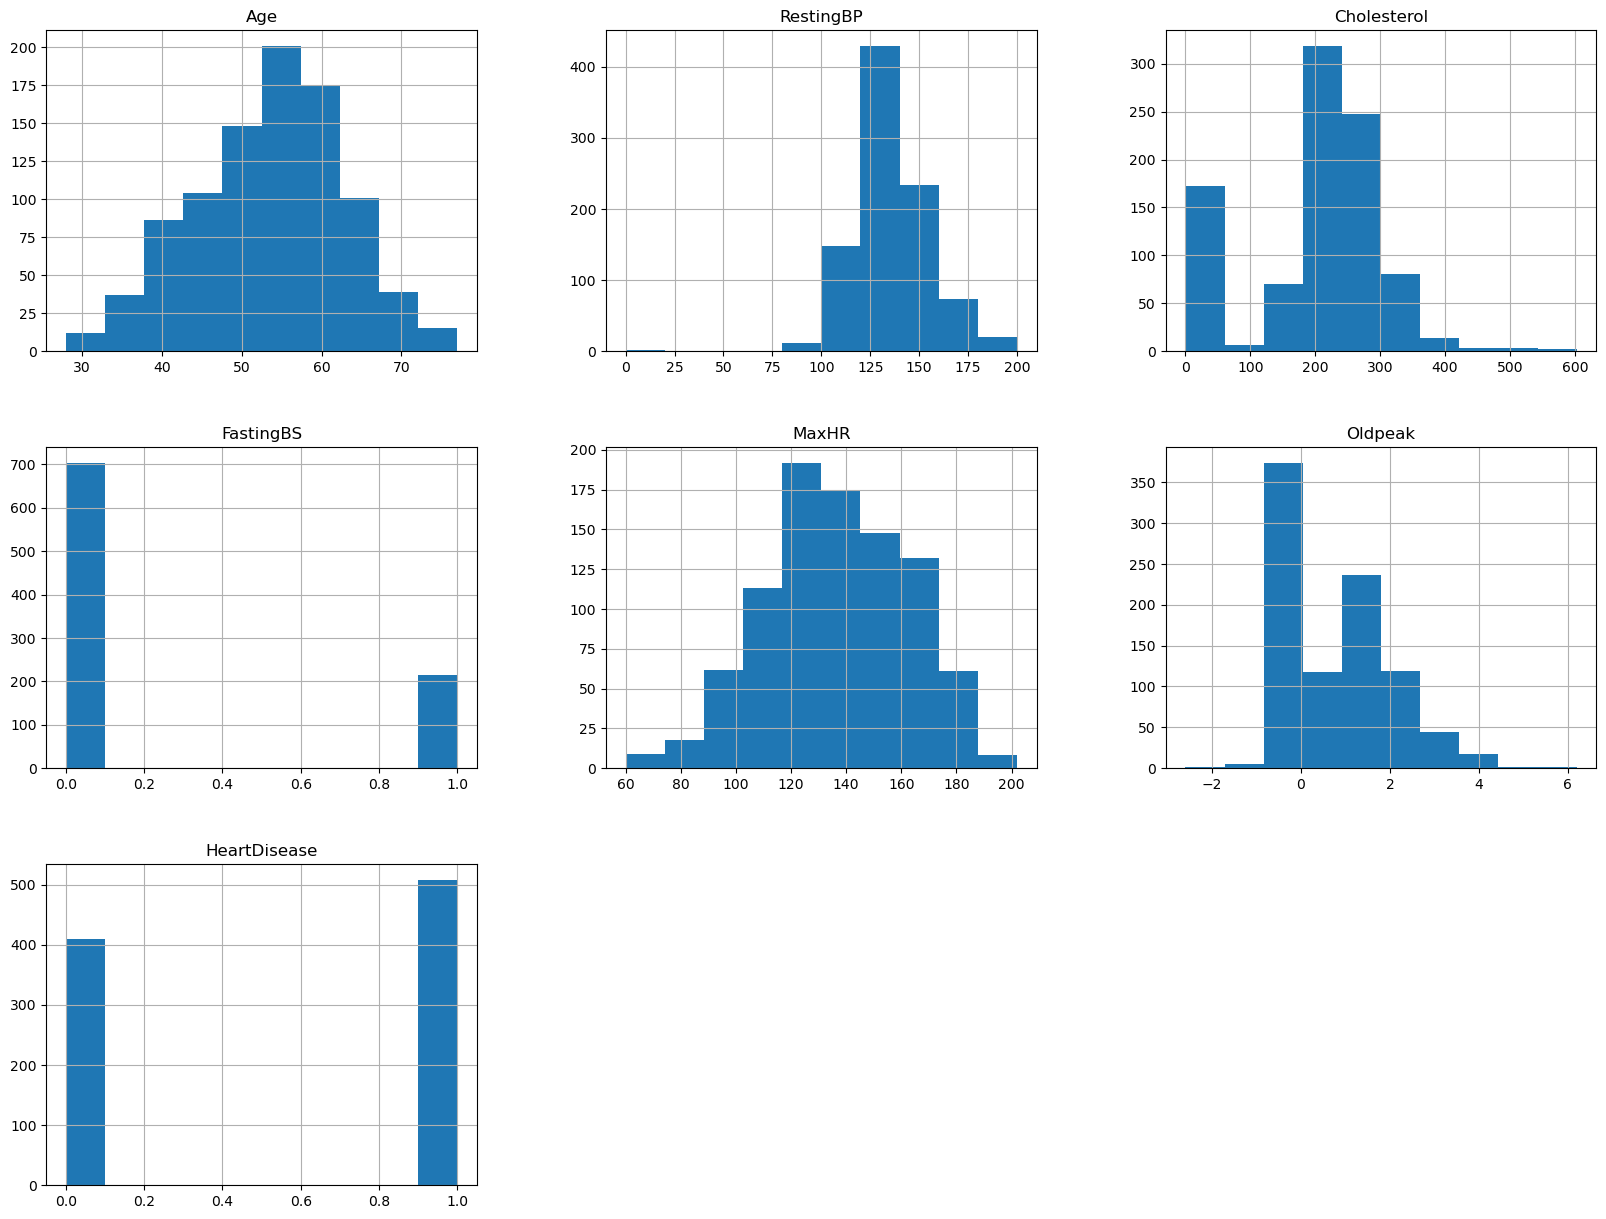

In [15]:
df.hist(figsize=(20,15))
plt.show()

## Preprocessing data

In [17]:
lab = LabelEncoder()

# extraemos las columnas categoricas
obj = df.select_dtypes(include='object')
# extraemos las no categoricas
no_obj = df.select_dtypes(exclude='object')

# transformamos las categoricas a numericas
for i in range(0 , obj.shape[1]):
    obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])

# concatenamos ambas tipos de columnas
df = pd.concat([obj , no_obj] , axis=1)

df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,68,144,193,1,141,3.4,1
915,1,0,1,1,1,57,130,131,0,115,1.2,1
916,0,1,0,0,1,57,130,236,0,174,0.0,1


## Start to creat the model

In [19]:
# Construccion de una funcion que realice el particionado completo
def train_val_test_split(df, rsate = 42, shuffle = True, stratify = None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size = 0.4, random_state = rsate, shuffle = shuffle, stratify = strat  
    )
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size = 0.5, random_state = rsate, shuffle = shuffle, stratify = strat
    )
    return (train_set, val_set, test_set)

In [20]:
# Division del DataSet en los diferentes SubConjuntos
train_set, val_set, test_set = train_val_test_split(df)

In [21]:
# DataSet General
X_df = df.drop("HeartDisease", axis = 1)
y_df = df["HeartDisease"].copy()

In [22]:
# DataSet de entrenamiento
X_train = train_set.drop("HeartDisease", axis = 1)
y_train = train_set["HeartDisease"].copy()

In [23]:
# DataSet de Validacion
X_val = val_set.drop("HeartDisease", axis = 1)
y_val = val_set["HeartDisease"].copy()

In [24]:
# DataSet de test
X_test = test_set.drop("HeartDisease", axis = 1)
y_test = test_set["HeartDisease"].copy()

In [25]:
# Creamos nuestro modelo de regresion logistica y entrenamos con en dataset de entreno
model = LogisticRegression(max_iter=10000)
model.fit(X_train , y_train)

LogisticRegression(max_iter=10000)

In [26]:
# Hacemos la prediccion del dataset de prueba y verificamos la precision
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
print('Precision:' , accuracy)

Precision: 0.875


In [27]:
from sklearn.metrics import f1_score
print("F1 score: ", f1_score(y_test, y_pred))

F1 score:  0.8909952606635072


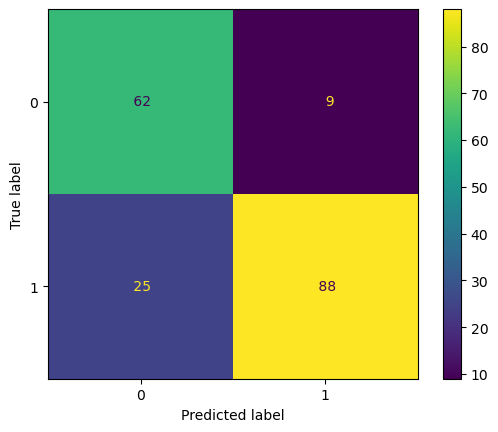

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(model, X_val, y_val, values_format = '3g')

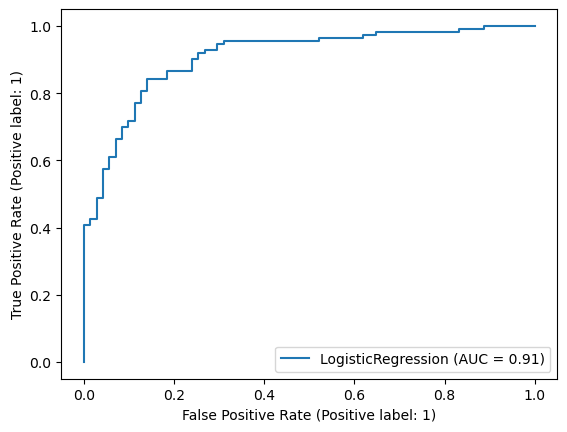

In [36]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_val, y_val)

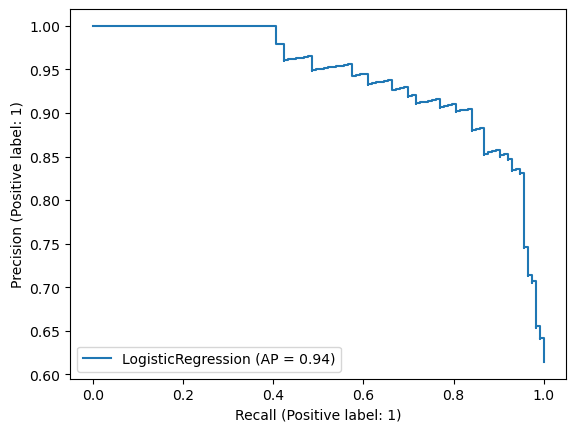

In [38]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, X_val, y_val)

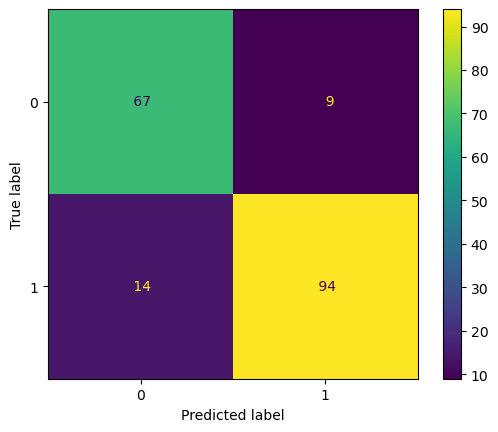

In [40]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, values_format = '3g' )